<div style="border: 2px solid black; padding: 20px; margin-bottom: 20px; text-align: center; 
            background: linear-gradient(to right, lightgreen, red); color: white; max-width: 100%; box-sizing: border-box;">
    <h1 style="margin: 0;">NEET 2024(July) Results Analysis</h1>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
df = pd.read_csv('master_data.csv')

# Convert Marks column to numeric
df['Marks'] = pd.to_numeric(df['Marks'])
total_rows = len(df)
print(f'Total number of Records: {total_rows}')


Total number of Records: 2333301


In [3]:
# 1 Print total number of rows and centers
total_rows = len(df)
total_centers = df['Center Name'].nunique()
print(f'Total number of Records: {total_rows}')
print(f'Total number of centers: {total_centers}')

Total number of Records: 2333301
Total number of centers: 4748


In [4]:
# Total number of students who scored 720
total_students_with_720 = df[df['Marks'] == 720].shape[0]

# Number of centers from where someone scored 720
centers_with_720 = df[df['Marks'] == 720]['Center Name'].nunique()

print(f'Total number of students who scored 720: {total_students_with_720}')
print(f'Number of centers where someone scored 720: {centers_with_720}')


Total number of students who scored 720: 61
Number of centers where someone scored 720: 58


In [5]:
# Total number of students who scored more than 700
total_students_above_700 = df[df['Marks'] >= 700].shape[0]

print(f'Total number of students who scored more than 700: {total_students_above_700}')

Total number of students who scored more than 700: 2324


In [6]:
# 2. Range of Marks
range_of_marks = df['Marks'].max() - df['Marks'].min()
print(f'Range of Marks: {range_of_marks}')

Range of Marks: 900


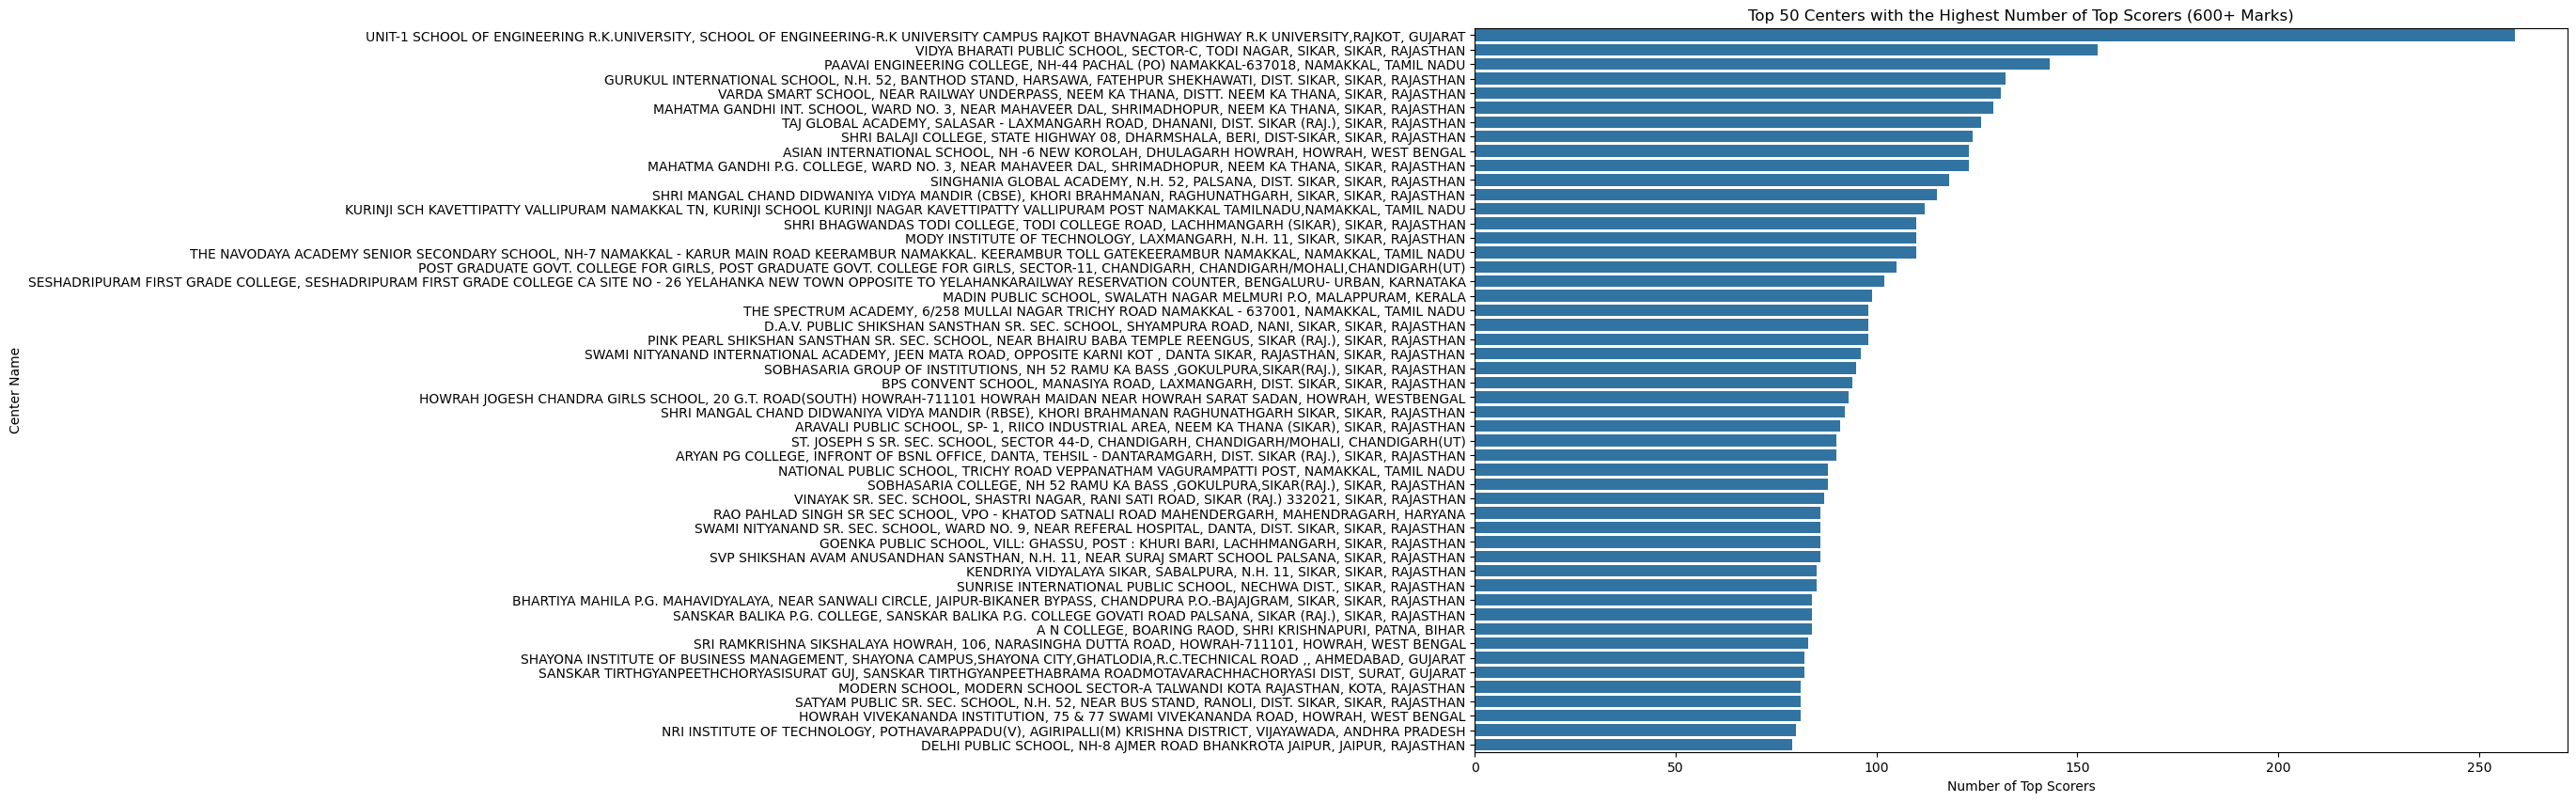

In [7]:
# 3. Top 50 centers with the highest number of top scorers
top_scorers = df[df['Marks'] >= 600]
top_centers = top_scorers['Center Name'].value_counts().head(50)

plt.figure(figsize=(15,10))
sns.barplot(x=top_centers.values, y=top_centers.index)
plt.title('Top 50 Centers with the Highest Number of Top Scorers (600+ Marks)')
plt.xlabel('Number of Top Scorers')
plt.ylabel('Center Name')
plt.show()

In [8]:
# Lets drill down further for Rajkot results
center_name = "UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY, SCHOOL OF ENGINEERING-R.K UNIVERSITY CAMPUS RAJKOT BHAVNAGAR HIGHWAY R.K UNIVERSITY,RAJKOT, GUJARAT"
print(f"Center Name: {center_name}")
students_above_600 = df[(df["Center Name"] == center_name) & (df["Marks"] >= 600)].shape[0]
print(f"Number of students who scored above 600 in this center : {students_above_600}")
students_above_650 = df[(df["Center Name"] == center_name) & (df["Marks"] >= 650)].shape[0]
print(f"Number of students who scored above 650 in this center : {students_above_650}")
students_above_700 = df[(df["Center Name"] == center_name) & (df["Marks"] >= 700)].shape[0]
print(f"Number of students who scored above 700 in this center : {students_above_700}")
students_equal_720 = df[(df["Center Name"] == center_name) & (df["Marks"] == 730)].shape[0]
print(f"Number of students who scored 720 in this center : {students_equal_720}")
print("Total no of students in this center: ", df[df["Center Name"] == center_name].shape[0])


Center Name: UNIT-1 SCHOOL OF ENGINEERING R.K.UNIVERSITY, SCHOOL OF ENGINEERING-R.K UNIVERSITY CAMPUS RAJKOT BHAVNAGAR HIGHWAY R.K UNIVERSITY,RAJKOT, GUJARAT
Number of students who scored above 600 in this center : 259
Number of students who scored above 650 in this center : 115
Number of students who scored above 700 in this center : 12
Number of students who scored 720 in this center : 0
Total no of students in this center:  1968


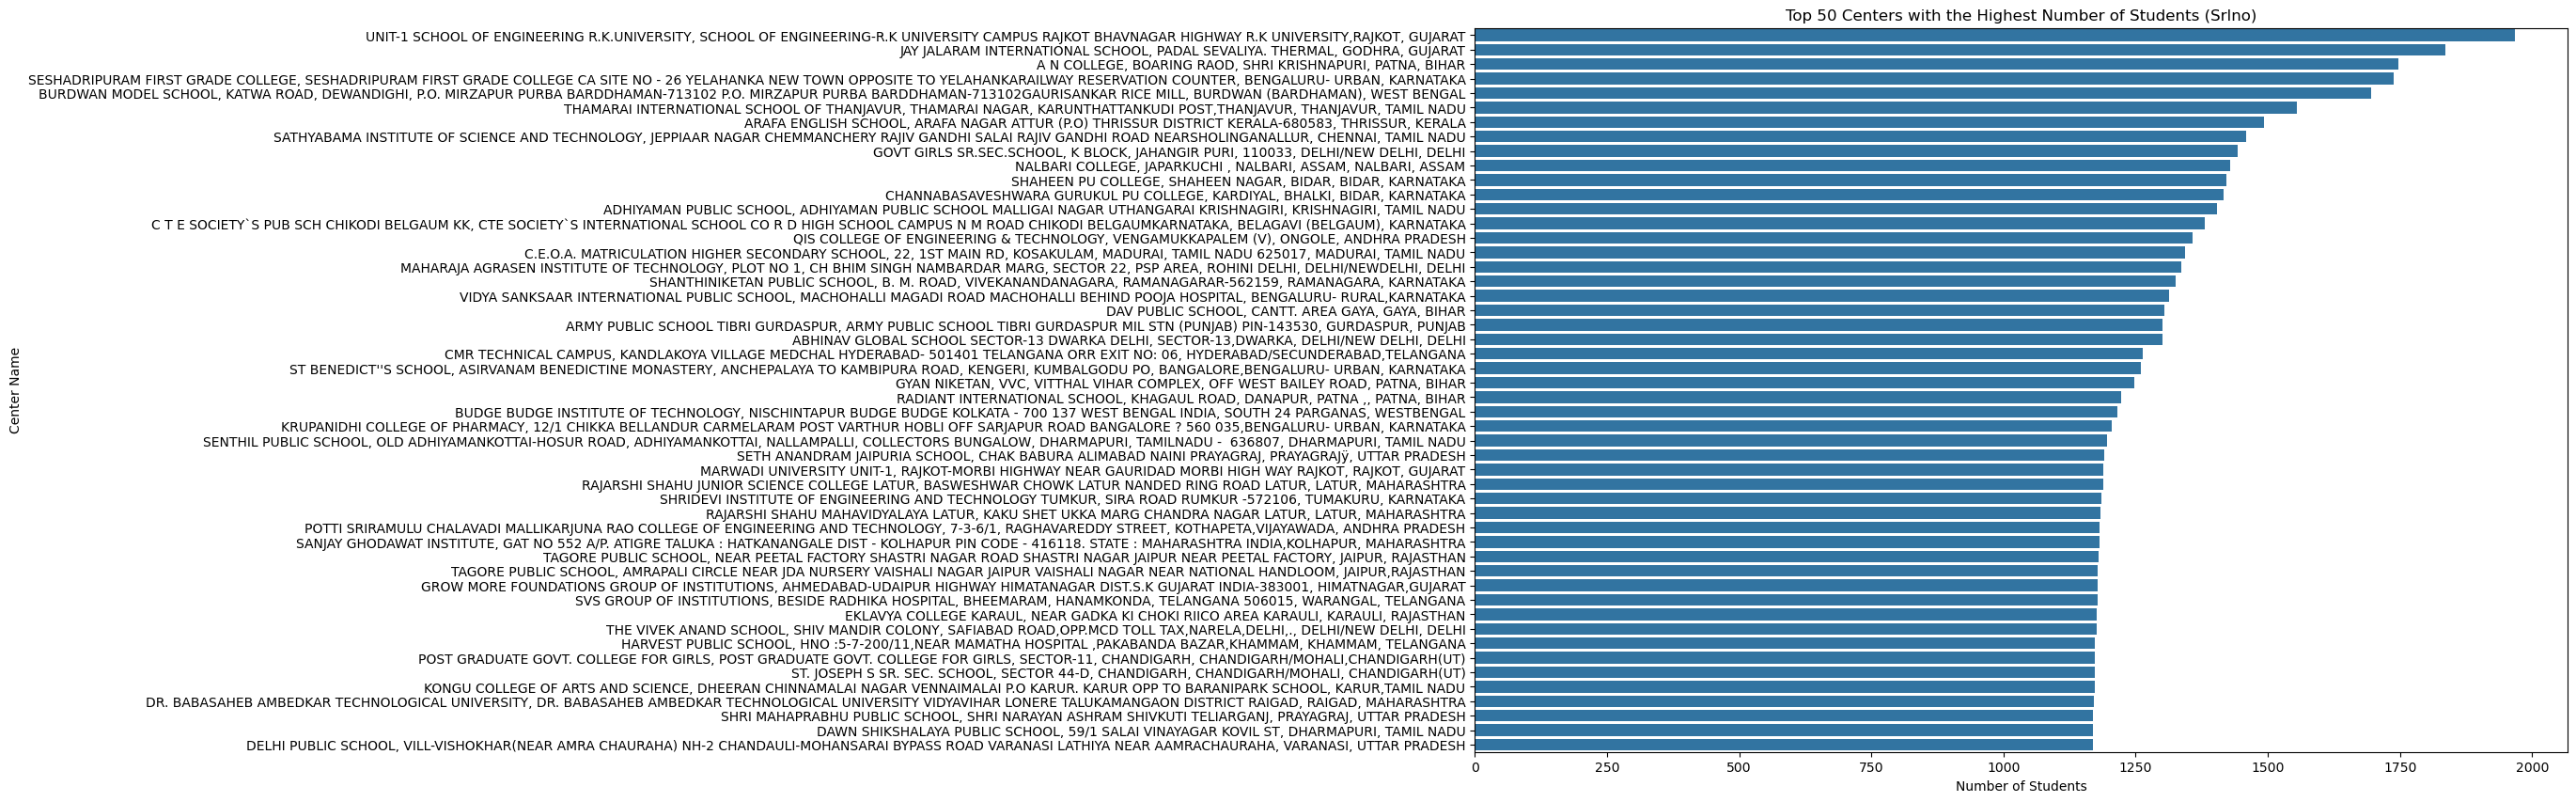

In [9]:
# Top 50 Centers with the Highest Number of Students (Srlno)
top_centers_by_students = df['Center Name'].value_counts().head(50)

plt.figure(figsize=(15,10))
sns.barplot(x=top_centers_by_students.values, y=top_centers_by_students.index)
plt.title('Top 50 Centers with the Highest Number of Students (Srlno)')
plt.xlabel('Number of Students')
plt.ylabel('Center Name')
plt.show()

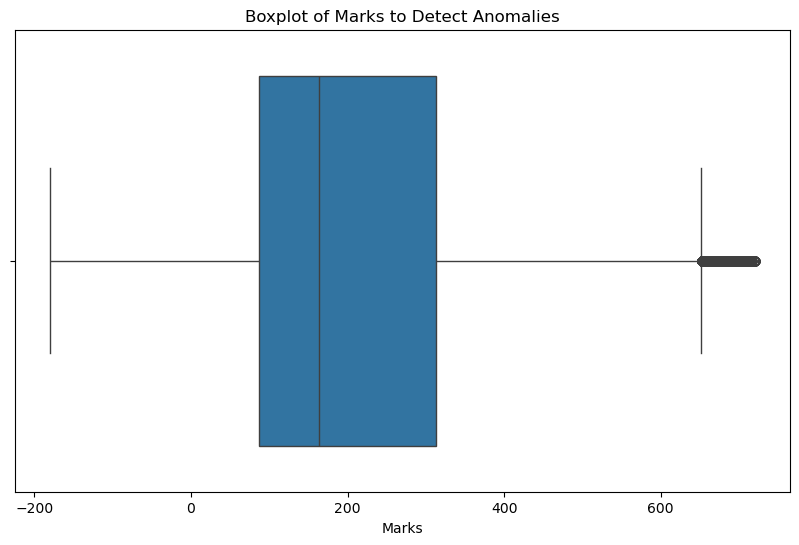

In [10]:
# 4. Anomaly Detection
# Checking for outliers using boxplot
plt.figure(figsize=(10,6))
sns.boxplot(x=df['Marks'])
plt.title('Boxplot of Marks to Detect Anomalies')
plt.show()

Text(0, 0.5, 'Center Name')

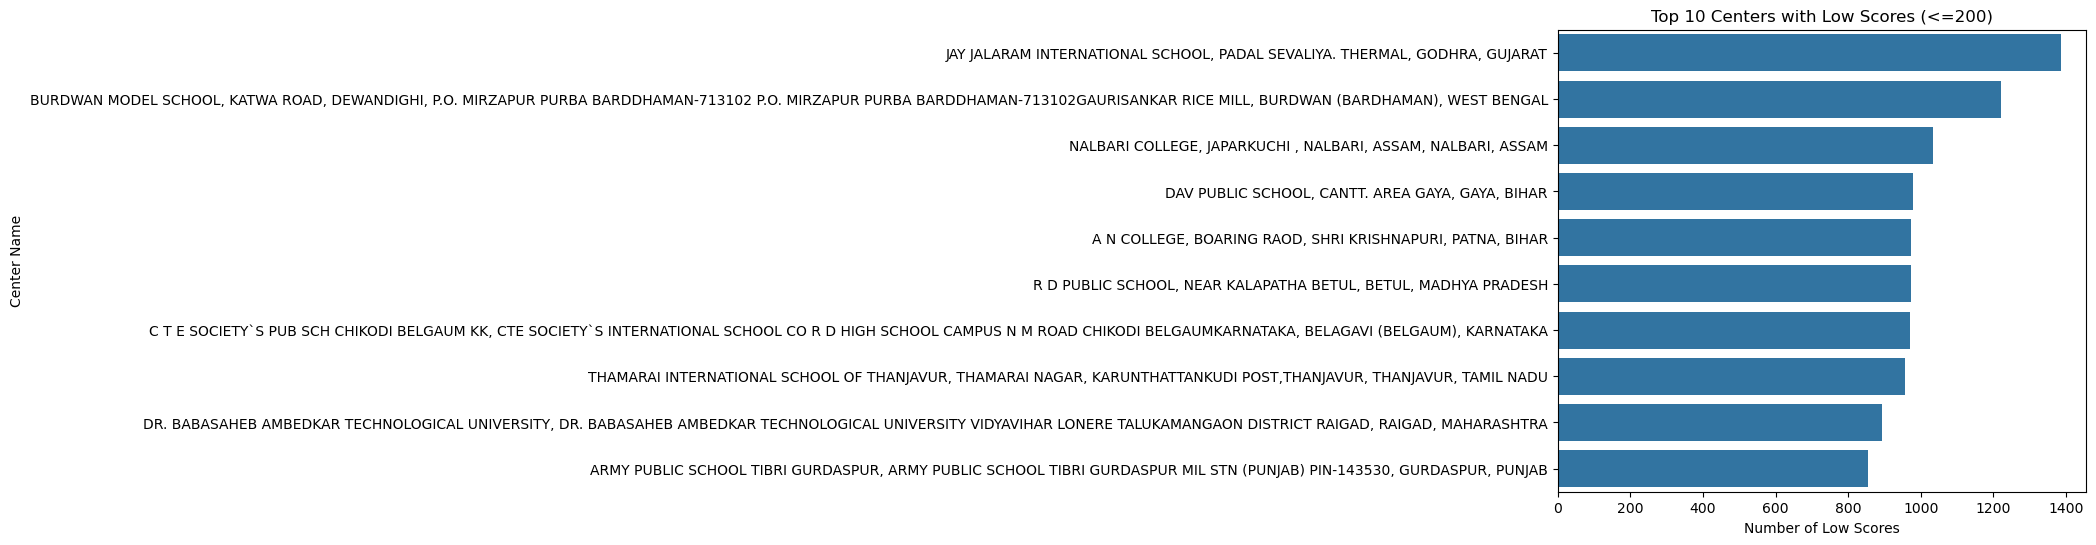

In [11]:
# 5. Relation of Center with Low Scores
low_scores = df[df['Marks'] <= 200]
high_scores = df[df['Marks'] >= 500]

low_score_centers = low_scores['Center Name'].value_counts().head(10)
high_score_centers = high_scores['Center Name'].value_counts().head(10)

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(x=low_score_centers.values, y=low_score_centers.index)
plt.title('Top 10 Centers with Low Scores (<=200)')
plt.xlabel('Number of Low Scores')
plt.ylabel('Center Name')



/var/folders/y0/ch801pzn1655ffg09gs6jf2r0000gn/T/ipykernel_31197/2702369121.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


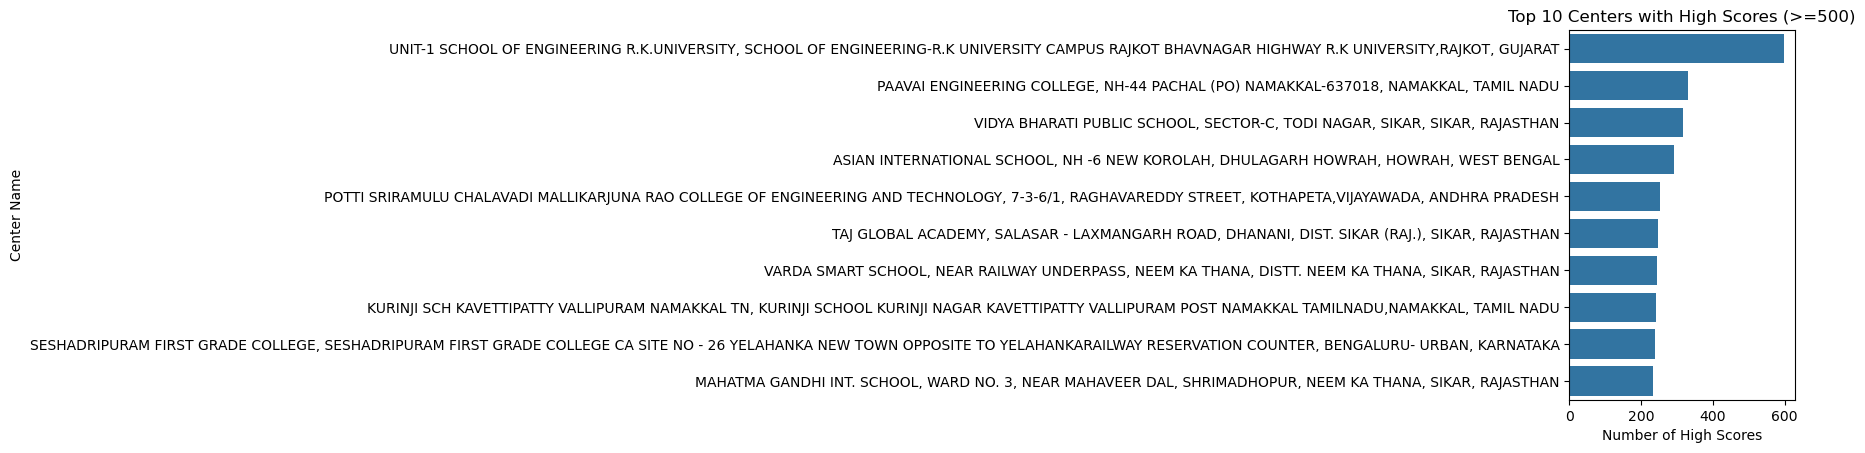

In [12]:
# 6. Relation of Center with High Scores
plt.subplot(1, 2, 2)
sns.barplot(x=high_score_centers.values, y=high_score_centers.index)
plt.title('Top 10 Centers with High Scores (>=500)')
plt.xlabel('Number of High Scores')
plt.ylabel('Center Name')

plt.tight_layout()
plt.show()

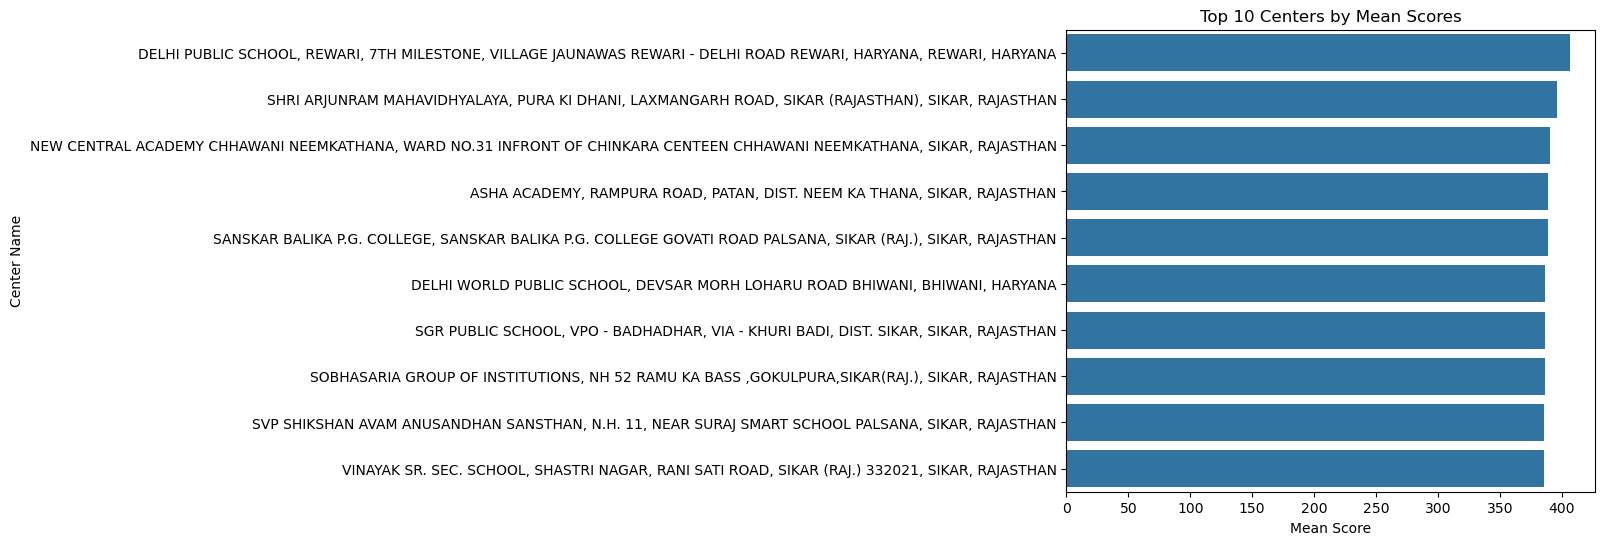

In [13]:

# 7. Mean and Median Scores per Center
mean_scores = df.groupby('Center Name')['Marks'].mean().sort_values(ascending=False).head(10)
median_scores = df.groupby('Center Name')['Marks'].median().sort_values(ascending=False).head(10)

plt.figure(figsize=(15,6))

plt.subplot(1, 2, 1)
sns.barplot(x=mean_scores.values, y=mean_scores.index)
plt.title('Top 10 Centers by Mean Scores')
plt.xlabel('Mean Score')
plt.ylabel('Center Name')
plt.show()

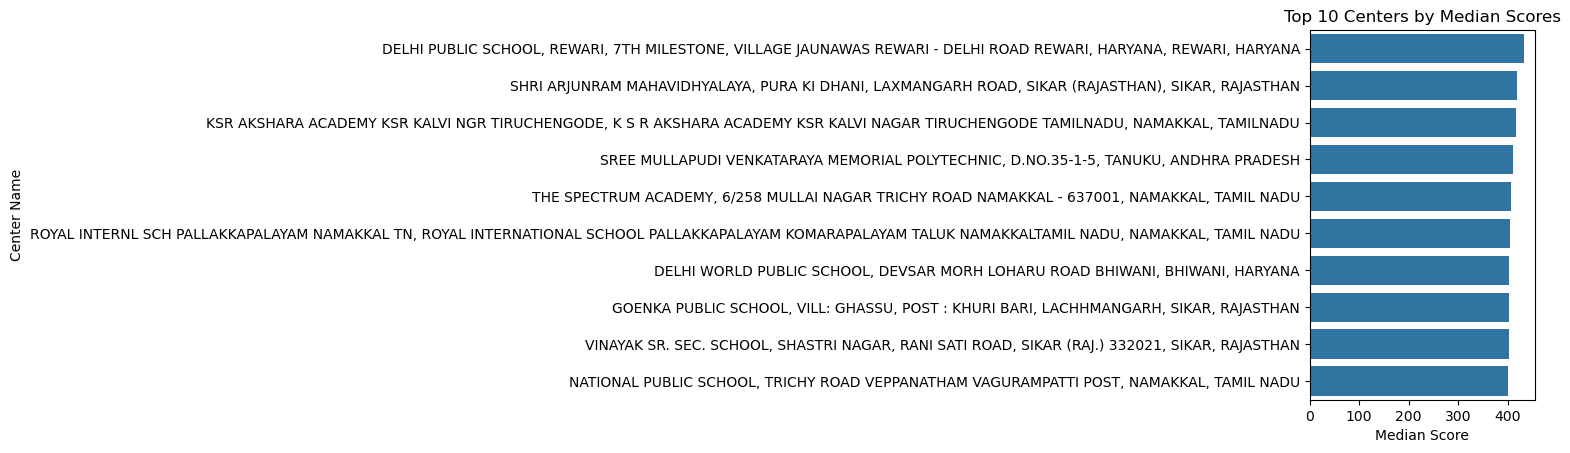

In [14]:
plt.subplot(1, 2, 2)
sns.barplot(x=median_scores.values, y=median_scores.index)
plt.title('Top 10 Centers by Median Scores')
plt.xlabel('Median Score')
plt.ylabel('Center Name')
plt.show()

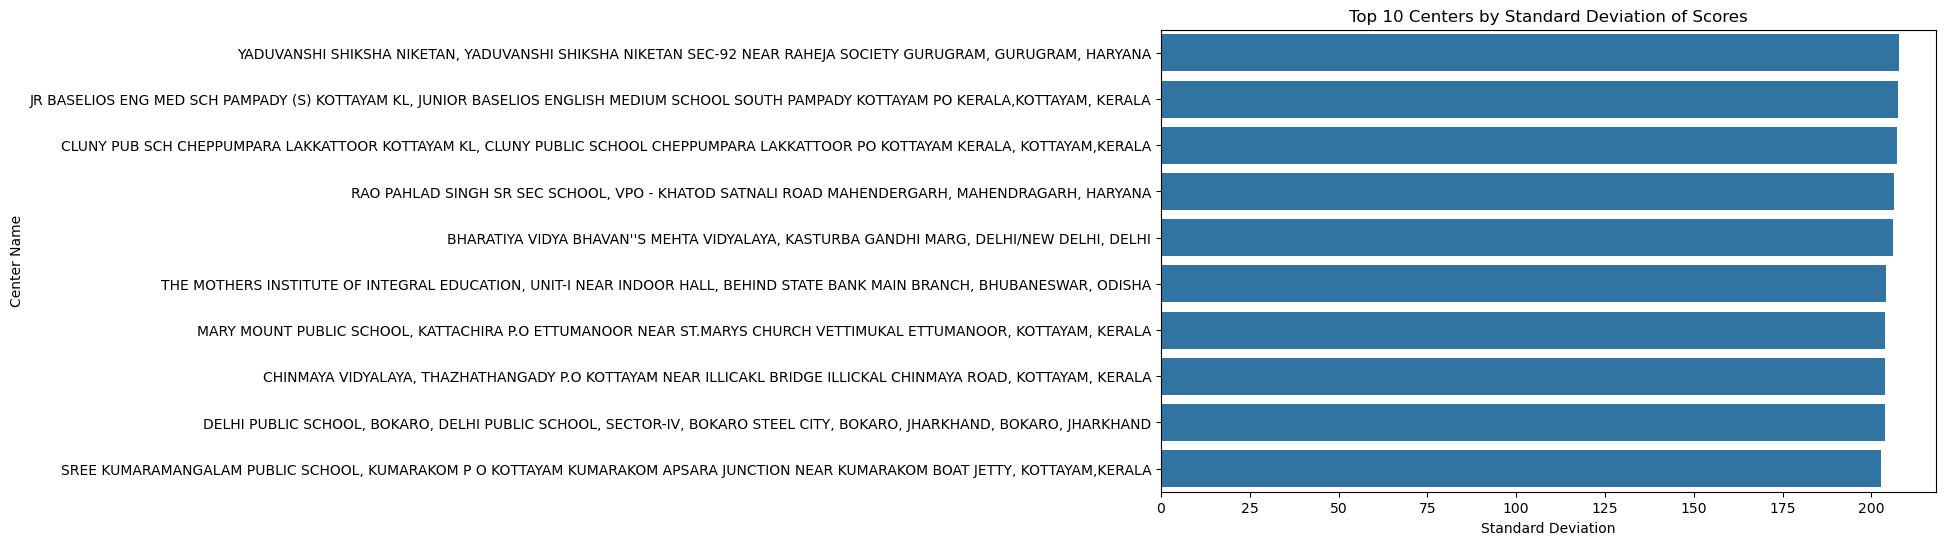

In [15]:
# 8. Standard Deviation of Scores per Center
std_dev_scores = df.groupby('Center Name')['Marks'].std().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=std_dev_scores.values, y=std_dev_scores.index)
plt.title('Top 10 Centers by Standard Deviation of Scores')
plt.xlabel('Standard Deviation')
plt.ylabel('Center Name')
plt.show()

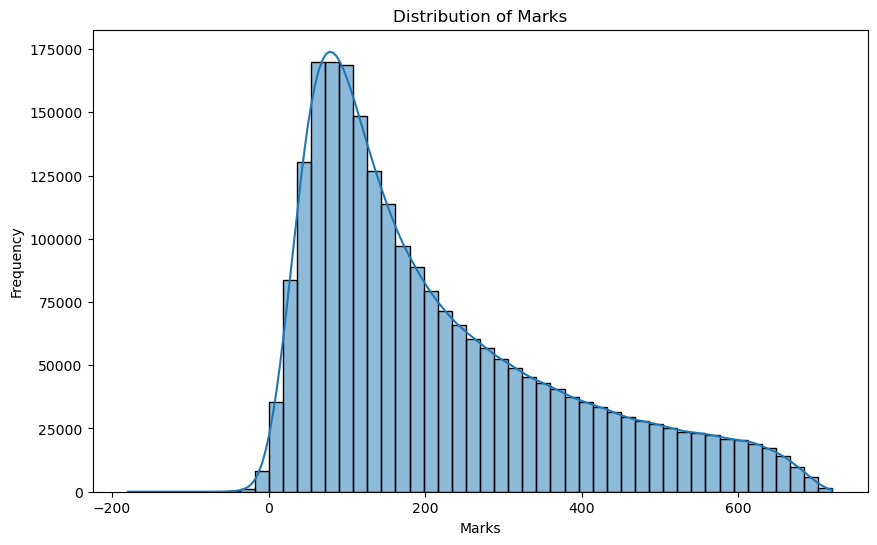

In [16]:
# 9. Distribution of Scores
plt.figure(figsize=(10,6))
sns.histplot(df['Marks'], bins=50, kde=True)
plt.title('Distribution of Marks')
plt.xlabel('Marks')
plt.ylabel('Frequency')
plt.show()

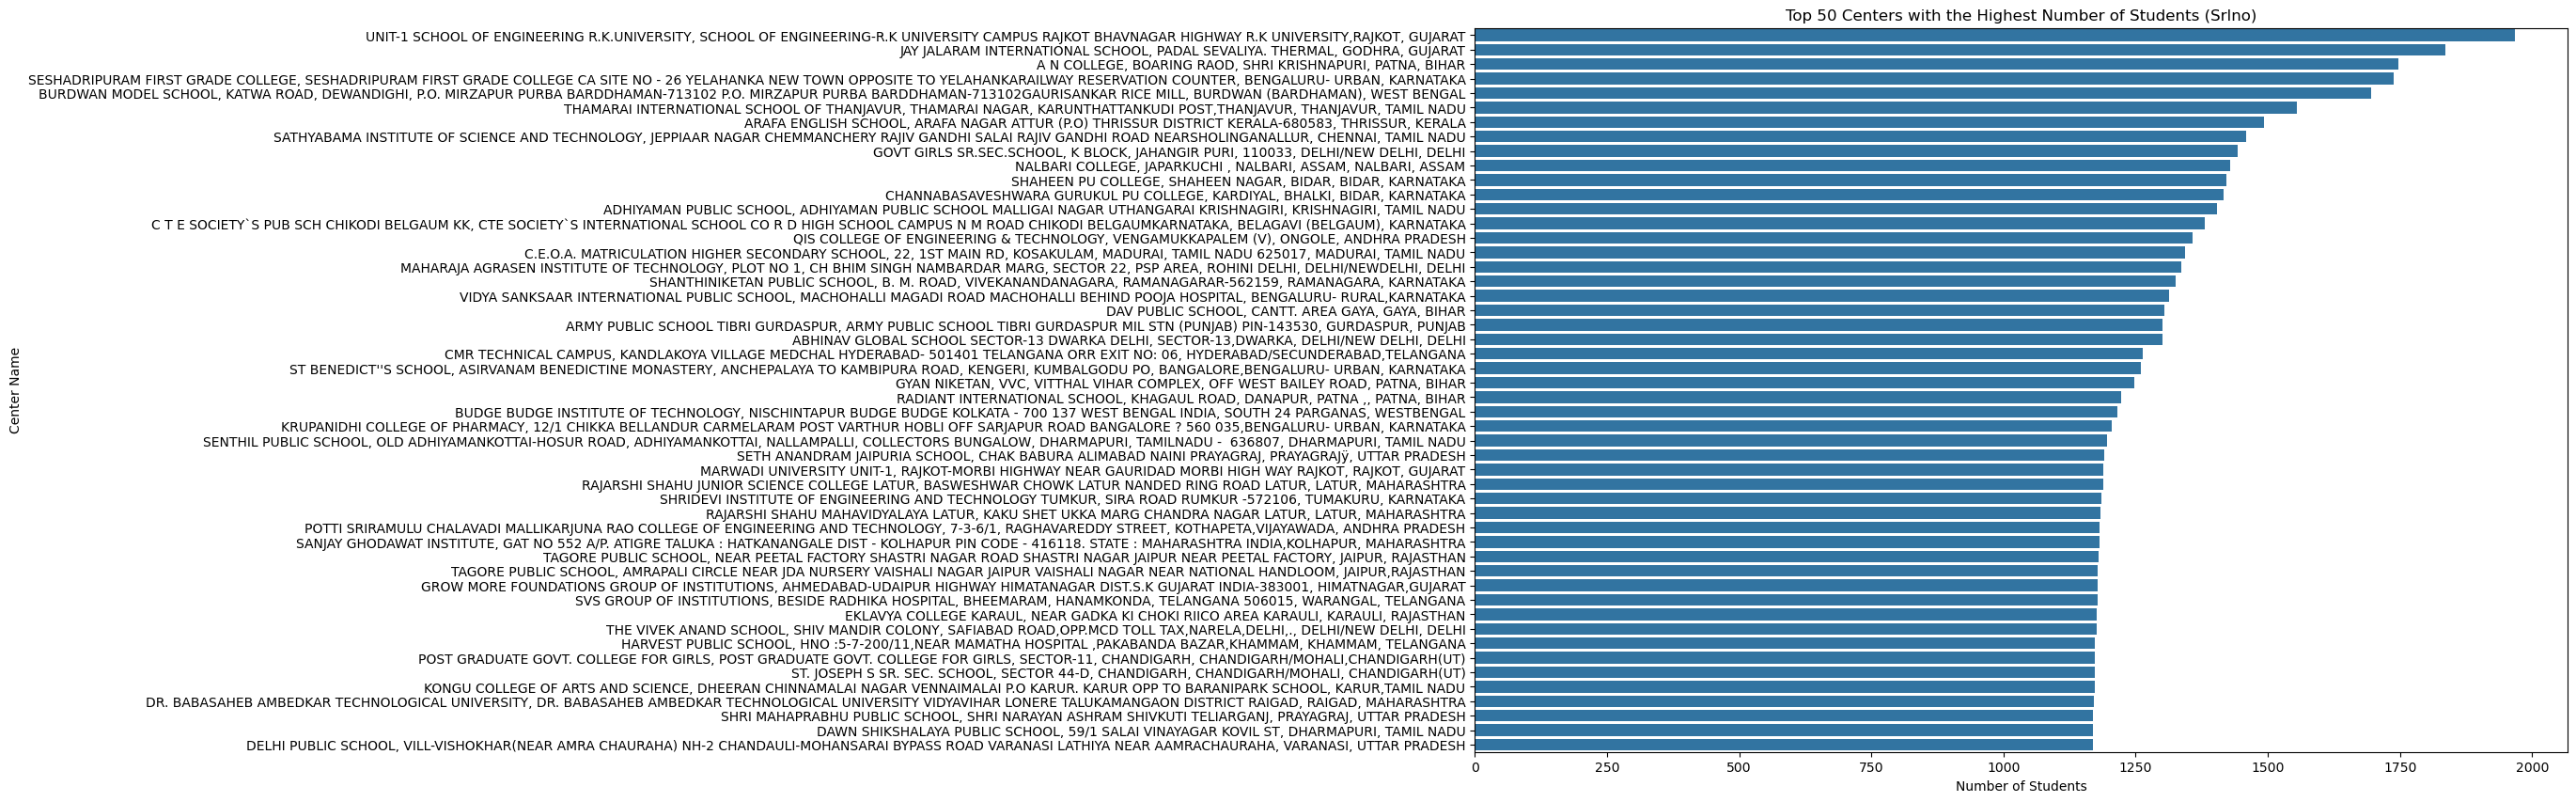

In [17]:
# 10. Top 50 Centers with the Highest Number of Students (Srlno)
top_centers_by_students = df['Center Name'].value_counts().head(50)

plt.figure(figsize=(15,10))
sns.barplot(x=top_centers_by_students.values, y=top_centers_by_students.index)
plt.title('Top 50 Centers with the Highest Number of Students (Srlno)')
plt.xlabel('Number of Students')
plt.ylabel('Center Name')
plt.show()

/var/folders/y0/ch801pzn1655ffg09gs6jf2r0000gn/T/ipykernel_31197/1461118904.py:11: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


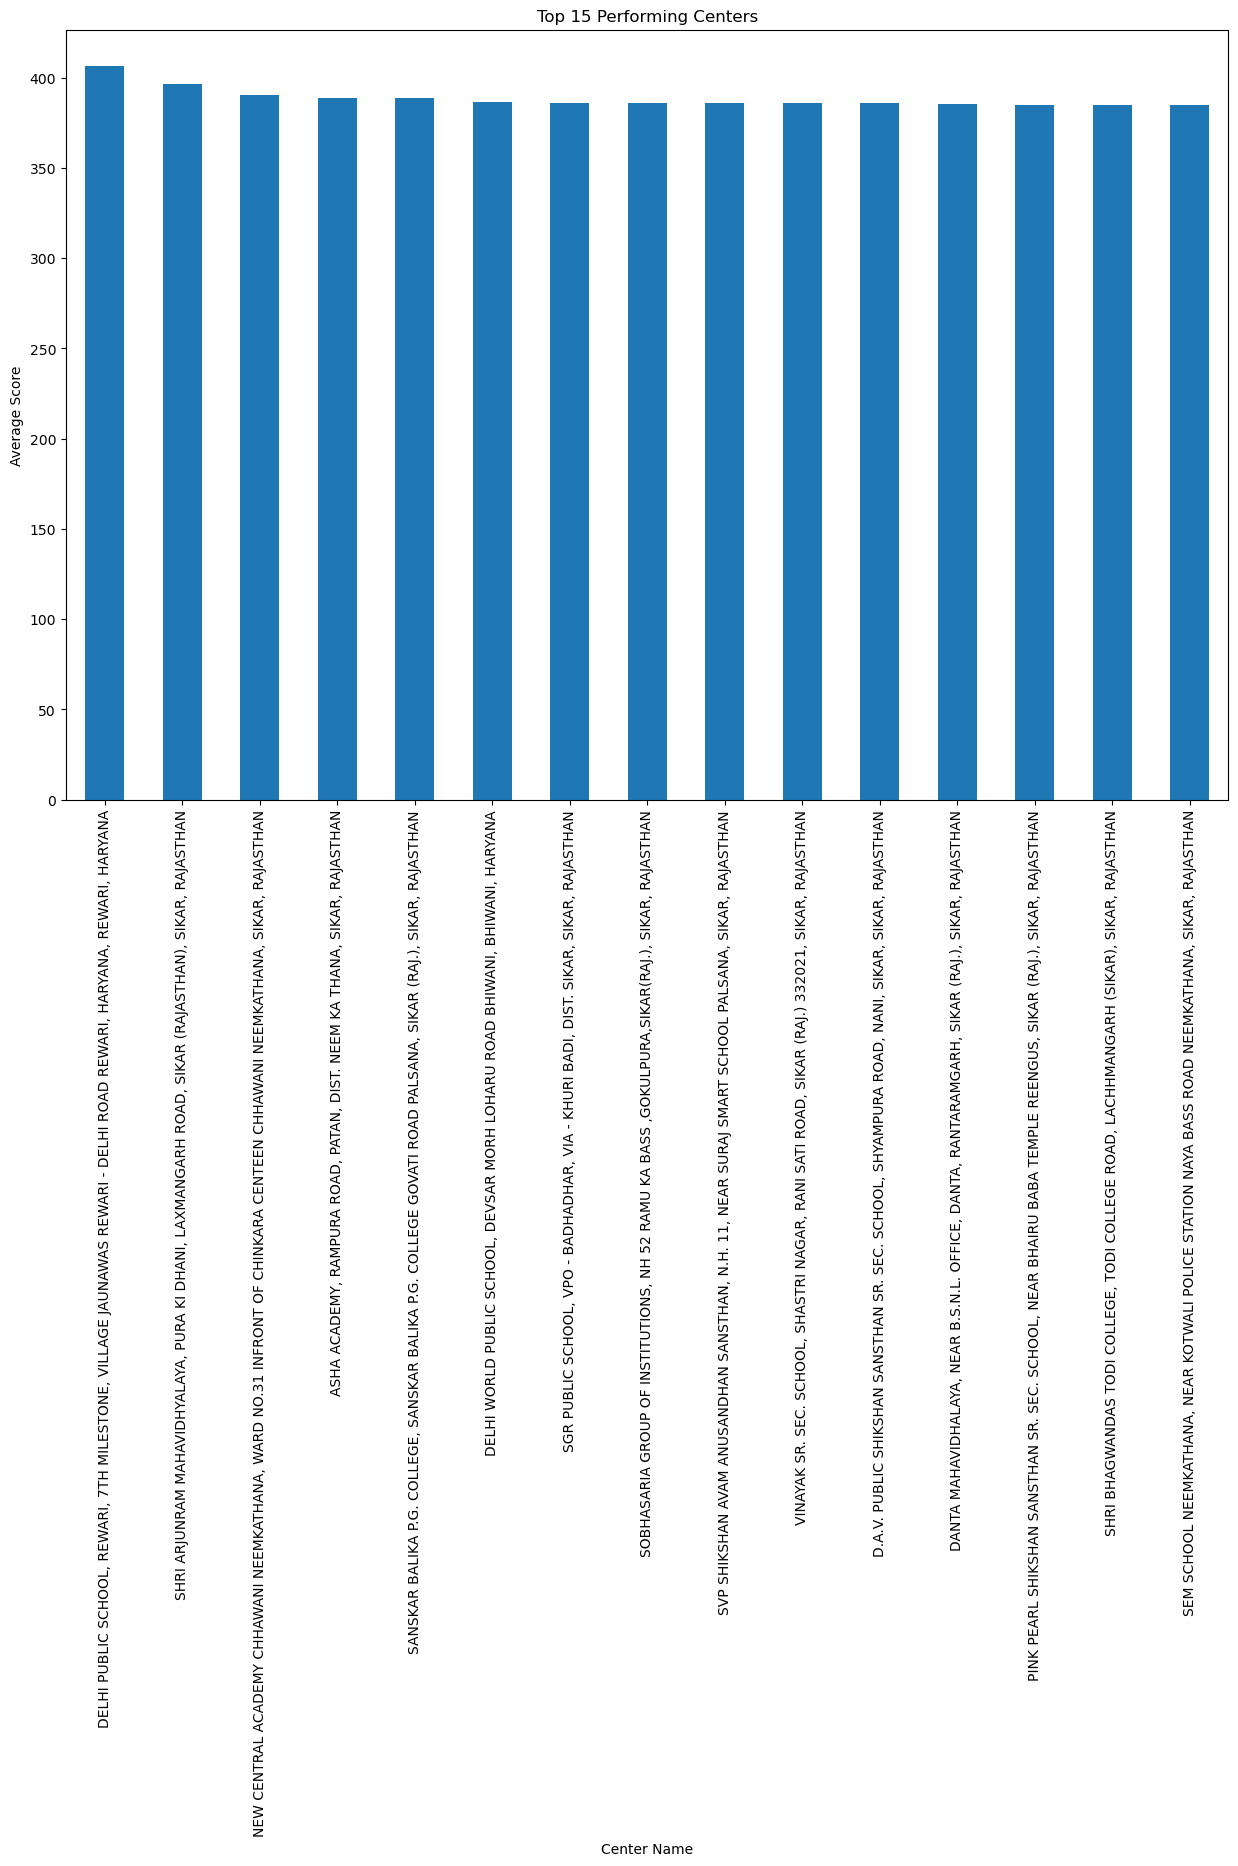

In [18]:
# Average scores across different exam centers
center_avg_scores = df.groupby('Center Name')['Marks'].mean().sort_values(ascending=False)

# Plot top 15 centers
plt.figure(figsize=(15, 10))
center_avg_scores.head(15).plot(kind='bar')
plt.title('Top 15 Performing Centers')
plt.xlabel('Center Name')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

/var/folders/y0/ch801pzn1655ffg09gs6jf2r0000gn/T/ipykernel_31197/2077633848.py:9: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


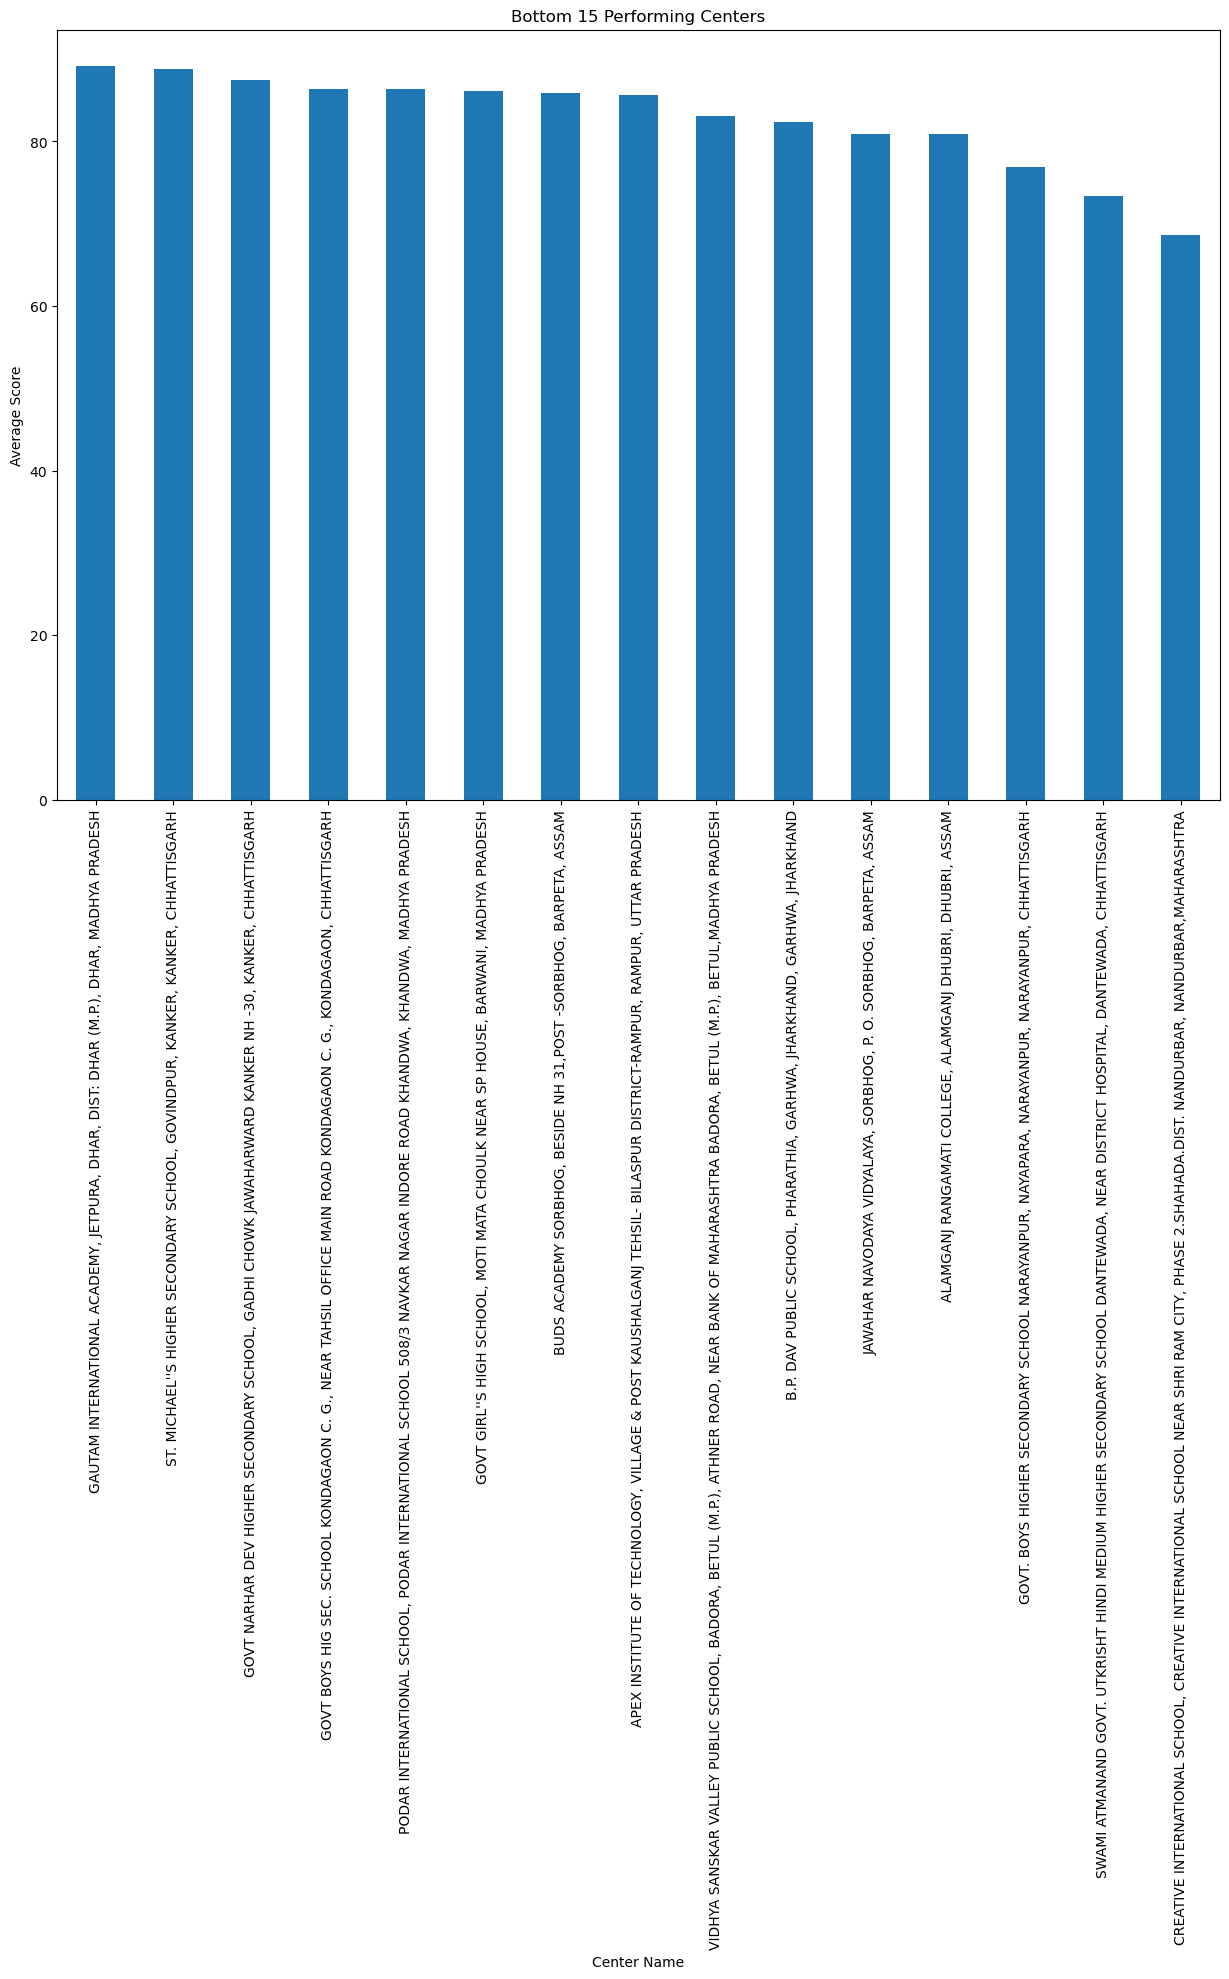

In [19]:

# Plot bottom 15 centers

plt.figure(figsize=(15, 10))
center_avg_scores.tail(15).plot(kind='bar')
plt.title('Bottom 15 Performing Centers')
plt.xlabel('Center Name')
plt.ylabel('Average Score')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()